In [1]:
# Create DataFrame with metadata for each day/condition of experiment

import os
import pandas as pd

def process_folder(directory):

    date = directory.split('/')[-1].split(' ')[0]

    data_directories =  [x[0] for x in os.walk(directory)][1:]

    plasmid_identity = {'pJRF004n1':'PerMn1-mNG','pJRF002':'mTq2-FtsB','pJRF007':'mTq2-FtsBdLQ','pJRF007dHelix':'mTq2-FtsBdLQdH','pJRF010':'Pf3-mNG','pZH813':'mNG'}

    strains = []
    aTc = [] # aTc concentration in nM
    IPTG = [] # IPTG concentration in uM
    dates = []

    for directory in data_directories:
        dir_info = directory.split('/')[-1]
        dir_info = dir_info.split('_')
        
        if len(dir_info) == 7:
            strains.append(plasmid_identity[dir_info[1]] + ' | ' + plasmid_identity[dir_info[2]])
            if dir_info[4]=='nM':
                aTc.append(int(dir_info[3]))
                IPTG.append(int(dir_info[5]))
            else:
                aTc.append(int(dir_info[5]))
                IPTG.append(int(dir_info[3]))
            dates.append(date)
        else:
            print(directory.split('/')[-1],'does not match known pattern')

    return pd.DataFrame.from_dict({'Strain':strains, 'aTc (nM)':aTc, 'IPTG (uM)':IPTG, 'Directory':data_directories, 'Date':dates})
            
root_dir = '../microscope-data/perm-stabilization/'
replicates = ['231005 PerM FtsB stablization', '231017 PerM Stabilization', '231018 PerM Stabilization']

replicates = [root_dir + r for r in replicates]

df = []

for r in replicates:
    df.append(process_folder(r))

df = pd.concat([x for x in df]).sort_values(['Date','Strain','aTc (nM)'],ignore_index=True)

df # show data frame summary

,Strain,aTc (nM),IPTG (uM),Directory,Date
0,PerMn1-mNG | mTq2-FtsB,10,100,../microscope-data/perm-stabilization/231005 P...,231005
1,PerMn1-mNG | mTq2-FtsBdLQ,0,100,../microscope-data/perm-stabilization/231005 P...,231005
2,PerMn1-mNG | mTq2-FtsBdLQ,10,100,../microscope-data/perm-stabilization/231005 P...,231005
3,PerMn1-mNG | mTq2-FtsBdLQdH,10,100,../microscope-data/perm-stabilization/231005 P...,231005
4,Pf3-mNG | mTq2-FtsBdLQ,10,240,../microscope-data/perm-stabilization/231005 P...,231005
5,mNG | mTq2-FtsBdLQ,10,60,../microscope-data/perm-stabilization/231005 P...,231005
6,PerMn1-mNG | mTq2-FtsB,10,100,../microscope-data/perm-stabilization/231017 P...,231017
7,PerMn1-mNG | mTq2-FtsBdLQ,0,100,../microscope-data/perm-stabilization/231017 P...,231017
8,PerMn1-mNG | mTq2-FtsBdLQ,10,100,../microscope-data/perm-stabilization/231017 P...,231017
9,PerMn1-mNG | mTq2-FtsBdLQdH,10,100,../microscope-data/perm-stabilization/231017 P...,231017


In [2]:
# Load in screening data; manually identified from overlaid images examples of extreme displacement between frames, very bad focus, or extremely bright or dim microcolonies

screening = pd.read_csv(root_dir + 'data-screening.tsv',sep='\t')

num_screened = len(screening)
print('Manual screening identified',num_screened,'potentially problematic image frames out of',20*6*3,'total images.')

screening # show screening summary

Manual screening identified 32 potentially problematic image frames out of 360 total images.


,Date,Condition,Rejected,Reason,Notes
0,231005,1_pJRF004n1_pJRF007_100_uM_0_nM,12,Bright cell CFP,NaN
1,231005,3_pJRF004n1_pJRF007_100_uM_10_nM,5,Poor segmentation,NaN
2,231005,3_pJRF004n1_pJRF007_100_uM_10_nM,12,Bright cell CFP,NaN
3,231005,4_pJRF004n1_pJRF007dHelix_100_uM_10_nM,1,Poor segmentation,NaN
4,231005,4_pJRF004n1_pJRF007dHelix_100_uM_10_nM,15,Bright cell CFP,NaN
5,231005,5_pJRF010_pJRF007_240_uM_10_nM,1,Poor segmentation,NaN
6,231005,5_pJRF010_pJRF007_240_uM_10_nM,11,Poor segmentation,NaN
7,231005,5_pJRF010_pJRF007_240_uM_10_nM,12,Poor segmentation,NaN
8,231005,5_pJRF010_pJRF007_240_uM_10_nM,13,Poor segmentation,NaN
9,231005,5_pJRF010_pJRF007_240_uM_10_nM,20,Bright cell CFP,NaN


In [3]:
# Load saved images from omnipose segmentation

import tifffile

from skimage.morphology import thin, binary_erosion, remove_small_objects
from skimage.measure import label
from skimage.segmentation import expand_labels
import numpy as np

def read_directory_images(dir):
    bf = list(tifffile.imread(dir + r'/bf.tif'))

    # subtract 1st percentile intensity of entire stack to get a reasonable estimate of background for our samples with some variation in background intensity in the gel pad and very low autofluorescence background from cells relative to signal from fluorescent proteins

    mNG = tifffile.imread(dir + r'/mNeonGreen_YFP.tif')
    bg = np.percentile(mNG,1)
    mNG = mNG - bg
    mNG[mNG < 0] = 0

    mTq2 = tifffile.imread(dir + r'/mTurquoise2_CFP.tif')
    bg = np.percentile(mTq2,1)
    mTq2 = mTq2 - bg
    mTq2[mTq2 < 0] = 0
    
    return bf, list(mNG), list(mTq2)

dirs = df.Directory.unique()
dates = df.Date.unique()

bf = {}
mNG = {}
mTq2 = {}
masks = {}
directories = {}

for date in dates:
    bf[date] = {}
    mNG[date] = {}
    mTq2[date] = {}
    masks[date] = {}
    directories[date] = {}

for dir in dirs:
    
    condition = dir.split('/')[-1]
    date = dir.split('/')[-2].split(' ')[0]
    
    directories[date][condition] = dir
    
    print('\nloading',date,condition)
    bf[date][condition], mNG[date][condition], mTq2[date][condition] = read_directory_images(dir)
    masks[date][condition] = tifffile.imread(dir + '/masks.tif')


loading 231005 2_pJRF004n1_pJRF002_100_uM_10_nM

loading 231005 1_pJRF004n1_pJRF007_100_uM_0_nM

loading 231005 3_pJRF004n1_pJRF007_100_uM_10_nM

loading 231005 4_pJRF004n1_pJRF007dHelix_100_uM_10_nM

loading 231005 5_pJRF010_pJRF007_240_uM_10_nM

loading 231005 6_pZH813_pJRF007_60_uM_10_nM

loading 231017 1_pJRF004n1_pJRF002_10_nM_100_uM

loading 231017 6_pJRF004n1_pJRF007_0_nM_100_uM

loading 231017 2_pJRF004n1_pJRF007_10_nM_100_uM

loading 231017 3_pJRF004n1_pJRF007dHelix_10_nM_100_uM

loading 231017 4_pJRF010_pJRF007_10_nM_240_uM

loading 231017 5_pZH813_pJRF007_10_nM_60_uM

loading 231018 1_pJRF004n1_pJRF002_10_nM_100_uM

loading 231018 6_pJRF004n1_pJRF007_0_nM_100_uM

loading 231018 2_pJRF004n1_pJRF007_10_nM_100_uM

loading 231018 3_pJRF004n1_pJRF007dHelix_10_nM_100_uM

loading 231018 4_pJRF010_pJRF007_10_nM_240_uM

loading 231018 5_pZH813_pJRF007_10_nM_60_uM


In [4]:
# cross correlate masks with fluorescence to register
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
import cv2 as cv
import numpy as np
from scipy import stats

# Align fluorescent image to inverted brightfield image; works better than aligning to segmented brightfield image
def register_imgs_bf(bf,mNG,mTq2,verbose=False):

    mNG_aligned = []
    mTq2_aligned = []
    
    for i in range(len(bf)):
        
        inv = bf[i].max() - bf[i]
        mNG_aligned.append(mNG[i])
        mTq2_aligned.append(mTq2[i])
        rows,cols = mNG_aligned[i].shape

        # subpixel shifts
        mNG_shift, _, _ = phase_cross_correlation(inv, cv.GaussianBlur(mNG_aligned[i],(5,5),cv.BORDER_REFLECT),upsample_factor=10,overlap_ratio=0.9)
        M = np.float32([[1,0,mNG_shift[1]],[0,1,mNG_shift[0]]])
        mNG_aligned[i] = cv.warpAffine(mNG_aligned[i],M,(cols,rows))
        
        mTq2_shift, _, _ = phase_cross_correlation(inv, cv.GaussianBlur(mTq2_aligned[i],(5,5),cv.BORDER_REFLECT),upsample_factor=10,overlap_ratio=0.9)
        M = np.float32([[1,0,mTq2_shift[1]],[0,1,mTq2_shift[0]]])
        mTq2_aligned[i] = cv.warpAffine(mTq2_aligned[i],M,(cols,rows))
        
        if verbose:
            print('mNG shift:', mNG_shift, '| mTq2 shift:', mTq2_shift)

    return mNG_aligned, mTq2_aligned

def spearman_correlation(A,B):
    res_spearman = stats.spearmanr(A, B)
    return res_spearman.statistic

def object_stats(masks,mNG,mTq2):
    
    mNG_mTq2_corr = []
    mNG_sum = []
    mTq2_sum = []
    area = []
    idx = []

    # background subtraction for better average fluorescence estimate
    bins = np.arange(0,500,5) # find bin with most counts from whole image for bins less than 500 counts
    h,_ = np.histogram(mTq2,bins)
    mTq2_bg = bins[h.argmax()]+2.5
    h,_ = np.histogram(mNG,bins)
    mNG_bg = bins[h.argmax()]+2.5

    for i in np.arange(1,masks.max()+1):
        idx.append(i)
        mNG_px = mNG[masks==i] - mNG_bg
        mTq2_px = mTq2[masks==i] - mTq2_bg
        mNG_mTq2_corr.append(spearman_correlation(mNG_px,mTq2_px))
        mNG_sum.append(mNG_px.sum())
        mTq2_sum.append(mTq2_px.sum())
        area.append(len(mNG_px))

    return np.array(idx), np.array(area), np.array(mNG_sum), np.array(mTq2_sum), np.array(mNG_mTq2_corr)

dates = df.Date.unique()

idx = {}
area = {}
mNG_sum = {}
mTq2_sum = {}
mNG_mTq2_corr = {}

use_filtering = True # True for primary analysis; False for robustness check in Methods
use_median = False # use mean otherwise for stats; only to check if mean is thrown way off by outliers

# Empirical filters from comparing area:intensity scatter plots to eliminate occasional dim/small missegmented objects
if use_filtering:
    min_area = 250
    min_mNG = 4e5
    min_mTq2 = 4e5
else:
    min_area = 0
    min_mNG = 0
    min_mTq2 = 0

for date in dates:

    idx[date] = {}
    area[date] = {}
    mNG_sum[date] = {}
    mTq2_sum[date] = {}
    mNG_mTq2_corr[date] = {}

    for condition in bf[date].keys():

        # Get manually screened out frames (poor focus, obvious outliers in colony intensity)
        if use_filtering:
            rejected = screening.loc[(screening.Date==int(date))*(screening.Condition==condition),'Rejected'].values
        else:
            rejected = []

        # align to brightfield
        mNG_aligned, mTq2_aligned = register_imgs_bf(bf[date][condition],mNG[date][condition],mTq2[date][condition])

        # Write aligned images
        with tifffile.TiffWriter(directories[date][condition] + '/mNG_aligned.tif') as tif:
            for frame in mNG_aligned:
                tif.write(frame.astype('uint16'), contiguous=True)

        with tifffile.TiffWriter(directories[date][condition] + '/mTq2_aligned.tif') as tif:
            for frame in mTq2_aligned:
                tif.write(frame.astype('uint16'), contiguous=True)
        
        idx[date][condition] = []
        area[date][condition] = []
        mNG_sum[date][condition] = []
        mTq2_sum[date][condition] = []
        mNG_mTq2_corr[date][condition] = []
        
        for i in range(len(masks[date][condition])):

            if ~np.any(rejected==i+1):
            
                idx_img, area_img, mNG_sum_img, mTq2_sum_img, mNG_mTq2_corr_img = object_stats(masks[date][condition][i],mNG_aligned[i],mTq2_aligned[i])
    
                ok = (mTq2_sum_img>min_mTq2)*(mNG_sum_img>min_mNG)*(area_img>min_area)
                
                idx[date][condition].append(idx_img[ok])
                area[date][condition].append(area_img[ok])
                mNG_sum[date][condition].append(mNG_sum_img[ok])
                mTq2_sum[date][condition].append(mTq2_sum_img[ok])
                mNG_mTq2_corr[date][condition].append(mNG_mTq2_corr_img[ok])

            else:
                print('Rejected',date,condition,i+1)

Rejected 231005 1_pJRF004n1_pJRF007_100_uM_0_nM 12
Rejected 231005 3_pJRF004n1_pJRF007_100_uM_10_nM 5
Rejected 231005 3_pJRF004n1_pJRF007_100_uM_10_nM 12
Rejected 231005 4_pJRF004n1_pJRF007dHelix_100_uM_10_nM 1
Rejected 231005 4_pJRF004n1_pJRF007dHelix_100_uM_10_nM 15
Rejected 231005 5_pJRF010_pJRF007_240_uM_10_nM 1
Rejected 231005 5_pJRF010_pJRF007_240_uM_10_nM 11
Rejected 231005 5_pJRF010_pJRF007_240_uM_10_nM 12
Rejected 231005 5_pJRF010_pJRF007_240_uM_10_nM 13
Rejected 231005 5_pJRF010_pJRF007_240_uM_10_nM 20
Rejected 231005 6_pZH813_pJRF007_60_uM_10_nM 4
Rejected 231005 6_pZH813_pJRF007_60_uM_10_nM 11
Rejected 231005 6_pZH813_pJRF007_60_uM_10_nM 15
Rejected 231005 6_pZH813_pJRF007_60_uM_10_nM 16
Rejected 231005 6_pZH813_pJRF007_60_uM_10_nM 18
Rejected 231005 6_pZH813_pJRF007_60_uM_10_nM 19
Rejected 231017 1_pJRF004n1_pJRF002_10_nM_100_uM 9
Rejected 231017 1_pJRF004n1_pJRF002_10_nM_100_uM 20
Rejected 231017 6_pJRF004n1_pJRF007_0_nM_100_uM 8
Rejected 231017 6_pJRF004n1_pJRF007_0_nM_1

/var/folders/5s/bxw093jd6wj429m_rr4h5yp80000gn/T/ipykernel_59110/573920622.py:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  res_spearman = stats.spearmanr(A, B)


Rejected 231017 4_pJRF010_pJRF007_10_nM_240_uM 19
Rejected 231018 1_pJRF004n1_pJRF002_10_nM_100_uM 6
Rejected 231018 1_pJRF004n1_pJRF002_10_nM_100_uM 16
Rejected 231018 6_pJRF004n1_pJRF007_0_nM_100_uM 13
Rejected 231018 4_pJRF010_pJRF007_10_nM_240_uM 18
Rejected 231018 5_pZH813_pJRF007_10_nM_60_uM 5
Rejected 231018 5_pZH813_pJRF007_10_nM_60_uM 6
Rejected 231018 5_pZH813_pJRF007_10_nM_60_uM 16
Rejected 231018 5_pZH813_pJRF007_10_nM_60_uM 20


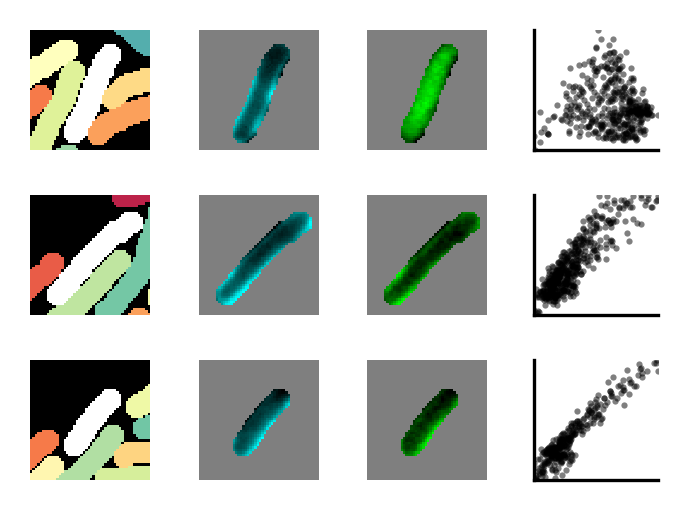

In [5]:
# scatter plots for example data for Fig. 2E

import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

d = '231018'
fs = ['5_pZH813_pJRF007_10_nM_60_uM','4_pJRF010_pJRF007_10_nM_240_uM','1_pJRF004n1_pJRF002_10_nM_100_uM']

i = 0
cs = 'rgb'

w = 25 # width and height of region of segmented image to show for each example

plot_idx = 16
r = 4
use_idx = True

plt.figure(figsize=1.2*np.array([2,1.5]),dpi=300)

for f in fs:
    
    m = masks[d][f] # load mask for day, condition

    if not use_idx:
        plot_idx = np.random.randint(1,len(m)) # random frame from mask images
    
    m = m[plot_idx] # limit mask data to this frame

    if not use_idx:
        r = np.random.randint(1,m.max()) # random cell from this frame

    yis, xis = np.nonzero(m == r)
    c_x = xis.mean().astype(int)
    c_y = yis.mean().astype(int)

    # make random colors for coloring mask image
    custom_palette = sns.color_palette("Spectral", m.max()+1)
    random.shuffle(custom_palette)
    custom_palette[0] = (0,0,0) # background zero
    custom_palette[r] = (1,1,1) # cell selected white
    
    mNG_aligned, mTq2_aligned = register_imgs_bf([bf[d][f][plot_idx]],[mNG[d][f][plot_idx]],[mTq2[d][f][plot_idx]])
    
    my_cmap = ListedColormap(custom_palette.as_hex())

    x = mNG_aligned[0][m==r]
    y = mTq2_aligned[0][m==r]

    plt.subplot(3,4,4*i+4)
    plt.plot(x,y,markerfacecolor='k',linestyle='None',markeredgecolor='none',marker='.',markersize=3,alpha=0.5) # change to only face and no edge color
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.xlim(np.percentile(x,[0,100])) #[x.mean()-3*x.std(),x.mean()+3*x.std()])
    plt.ylim(np.percentile(y,[0,100]))
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.subplot(3,4,4*i+1)
    fig = plt.imshow(m[c_y-w:c_y+w,c_x-w:c_x+w],cmap=my_cmap,interpolation='none',vmin=0,vmax=m.max())
    plt.gca().set_axis_off()

    plt.subplot(3,4,4*i+2)
    mTq2_aligned = mTq2_aligned[0]
    mTq2_aligned[m != r] = 0
    cmap = LinearSegmentedColormap.from_list('cyan_map', [(0,0,0),(0,1,1)], N=256)
    cmap.set_under((0.5,0.5,0.5))
    mTq2_cropped = mTq2_aligned[c_y-w:c_y+w,c_x-w:c_x+w]
    mTq2_nonzero = mTq2_cropped[mTq2_cropped>0]
    fig = plt.imshow(mTq2_cropped,cmap=cmap,interpolation='none',vmin=mTq2_nonzero.min(),vmax=mTq2_nonzero.max())
    plt.gca().set_axis_off()

    plt.subplot(3,4,4*i+3)
    mNG_aligned = mNG_aligned[0]
    mNG_aligned[m != r] = 0
    cmap = LinearSegmentedColormap.from_list('green_map', [(0,0,0),(0,1,0)], N=256)
    cmap.set_under((0.5,0.5,0.5))
    mNG_cropped = mNG_aligned[c_y-w:c_y+w,c_x-w:c_x+w]
    mNG_nonzero = mNG_cropped[mNG_cropped>0]
    fig = plt.imshow(mNG_cropped,cmap=cmap,interpolation='none',vmin=mNG_nonzero.min(),vmax=mNG_nonzero.max())
    plt.gca().set_axis_off()

    i += 1
plt.tight_layout()
plt.savefig('sample_data_mNG_Pf3_PerM-FtsB.svg',dpi=300)

In [6]:
def get_average_results(dir):

    condition = dir.split('/')[-1]
    date = dir.split('/')[-2].split(' ')[0]

    all_idx = np.concatenate(idx[date][condition])
    all_mNG = np.concatenate(mNG_sum[date][condition])
    all_mTq2 = np.concatenate(mTq2_sum[date][condition])
    all_area = np.concatenate(area[date][condition])
    all_mNG_conc = all_mNG / all_area
    all_mTq2_conc = all_mTq2 / all_area
    all_corr = np.concatenate(mNG_mTq2_corr[date][condition])

    if use_filtering:
        pct = [2.5, 97.5]
    else:
        pct = [0, 100]
        
    mNG_lim = np.percentile(all_mNG_conc,pct)
    mTq2_lim = np.percentile(all_mTq2_conc,pct)
    area_lim = np.percentile(all_area,pct)

    ok = (mNG_lim[0]<=all_mNG_conc)*(all_mNG_conc<=mNG_lim[1])*(mTq2_lim[0]<=all_mTq2_conc)*(all_mTq2_conc<=mTq2_lim[1])*(area_lim[0]<=all_area)*(all_area<=area_lim[1])

    n = len(all_idx[ok])

    if use_median:
        return n, np.median(all_mNG[ok]), np.median(all_mTq2[ok]), np.median(all_mNG_conc[ok]), np.median(all_mTq2_conc[ok]),np.median(all_area[ok]), np.median(all_corr[ok])
    else:
        return n, all_mNG[ok].mean(), all_mTq2[ok].mean(), all_mNG_conc[ok].mean(), all_mTq2_conc[ok].mean(),all_area[ok].mean(), all_corr[ok].mean()

df[['n', 'mNG', 'mTq2', 'mNG_conc', 'mTq2_conc','area', 'corr']] = ''

for dir in df.Directory.unique():
    df.loc[df.Directory==dir,['n', 'mNG', 'mTq2', 'mNG_conc', 'mTq2_conc', 'area', 'corr']] = get_average_results(dir)

# write out all correlations to single csv file

plasmid_identity = {'pJRF004n1':'PerMn1-mNG','pJRF002':'mTq2-FtsB','pJRF007':'mTq2-FtsBdLQ','pJRF007dHelix':'mTq2-FtsBdLQdH','pJRF010':'Pf3-mNG','pZH813':'mNG'}
df_all_corr = pd.DataFrame({'Condition':[],'Date':[],'Correlation':[]})

for dir in df.Directory.unique():
    condition = dir.split('/')[-1]
    date = dir.split('/')[-2].split(' ')[0]
    
    dir_info = condition.split('_')
            
    if len(dir_info) == 7:
        strain = plasmid_identity[dir_info[1]] + ' | ' + plasmid_identity[dir_info[2]]
        if dir_info[4]=='nM':
            aTc = dir_info[3]
            IPTG = dir_info[5]
        else:
            aTc = dir_info[5]
            IPTG = dir_info[3]

    
    all_idx = np.concatenate(idx[date][condition])
    all_mNG = np.concatenate(mNG_sum[date][condition])
    all_mTq2 = np.concatenate(mTq2_sum[date][condition])
    all_area = np.concatenate(area[date][condition])
    all_mNG_conc = all_mNG / all_area
    all_mTq2_conc = all_mTq2 / all_area
    all_corr = np.concatenate(mNG_mTq2_corr[date][condition])

    if use_filtering:
        pct = [2.5, 97.5]
    else:
        pct = [0, 100]
        
    mNG_lim = np.percentile(all_mNG_conc,pct)
    mTq2_lim = np.percentile(all_mTq2_conc,pct)
    area_lim = np.percentile(all_area,pct)

    ok = (mNG_lim[0]<=all_mNG_conc)*(all_mNG_conc<=mNG_lim[1])*(mTq2_lim[0]<=all_mTq2_conc)*(all_mTq2_conc<=mTq2_lim[1])*(area_lim[0]<=all_area)*(all_area<=area_lim[1])

    df2 = pd.DataFrame({'Correlation':all_corr[ok]})
    df2.insert(0,'Date',date)
    df2.insert(0,'Condition','_'.join([strain,aTc,IPTG]))

    df_all_corr = pd.concat([df_all_corr,df2])

df.sort_values(['Strain','aTc (nM)','Date'])

,Strain,aTc (nM),IPTG (uM),Directory,Date,n,mNG,mTq2,mNG_conc,mTq2_conc,area,corr
0,PerMn1-mNG | mTq2-FtsB,10,100,../microscope-data/perm-stabilization/231005 P...,231005,616,1410922.53505,9294901.774167,3290.138164,21678.674726,429.933442,0.79923
6,PerMn1-mNG | mTq2-FtsB,10,100,../microscope-data/perm-stabilization/231017 P...,231017,514,1326003.137861,7370066.141334,3569.614783,19869.169525,371.496109,0.805157
12,PerMn1-mNG | mTq2-FtsB,10,100,../microscope-data/perm-stabilization/231018 P...,231018,348,1199219.325656,7743494.790525,2940.318872,18916.361373,408.833333,0.809229
1,PerMn1-mNG | mTq2-FtsBdLQ,0,100,../microscope-data/perm-stabilization/231005 P...,231005,729,1010332.961639,994793.884174,2519.472462,2477.113754,402.399177,0.73474
7,PerMn1-mNG | mTq2-FtsBdLQ,0,100,../microscope-data/perm-stabilization/231017 P...,231017,348,960861.44946,943700.953386,2235.048323,2197.747586,430.37069,0.695591
13,PerMn1-mNG | mTq2-FtsBdLQ,0,100,../microscope-data/perm-stabilization/231018 P...,231018,474,950865.199,951796.681593,2285.639496,2289.373198,416.761603,0.70692
2,PerMn1-mNG | mTq2-FtsBdLQ,10,100,../microscope-data/perm-stabilization/231005 P...,231005,635,1256519.568765,9762624.753719,3065.980206,23803.138474,411.469291,0.878636
8,PerMn1-mNG | mTq2-FtsBdLQ,10,100,../microscope-data/perm-stabilization/231017 P...,231017,823,896632.740531,7201686.338684,2262.307285,18116.958608,397.616039,0.840427
14,PerMn1-mNG | mTq2-FtsBdLQ,10,100,../microscope-data/perm-stabilization/231018 P...,231018,660,1069875.083709,7511316.409048,2787.745564,19514.431074,385.690909,0.886469
3,PerMn1-mNG | mTq2-FtsBdLQdH,10,100,../microscope-data/perm-stabilization/231005 P...,231005,584,1015748.638587,10101146.330155,2307.093956,22894.655534,442.193493,0.590457


In [7]:
df_stats = pd.DataFrame({'Strain':[],'aTc (nM)':[], 'IPTG (uM)':[], 'Date':[], 'mNG_conc':[], 'mTq2_conc':[],'Correlation':[]})

for dir in df.Directory.unique():

    condition = dir.split('/')[-1]
    date = dir.split('/')[-2].split(' ')[0]

    dir_info = condition.split('_')
            
    if len(dir_info) == 7:
        strain = plasmid_identity[dir_info[1]] + ' | ' + plasmid_identity[dir_info[2]]
        if dir_info[4]=='nM':
            aTc = dir_info[3]
            IPTG = dir_info[5]
        else:
            aTc = dir_info[5]
            IPTG = dir_info[3]

    if aTc=="0":
        strain = strain + ' uninduced'
    
    all_idx = np.concatenate(idx[date][condition])
    all_mNG = np.concatenate(mNG_sum[date][condition])
    all_mTq2 = np.concatenate(mTq2_sum[date][condition])
    all_area = np.concatenate(area[date][condition])
    all_mNG_conc = all_mNG / all_area
    all_mTq2_conc = all_mTq2 / all_area
    all_corr = np.concatenate(mNG_mTq2_corr[date][condition])

    if use_filtering:
        pct = [2.5, 97.5]
    else:
        pct = [0, 100]
        
    mNG_lim = np.percentile(all_mNG_conc,pct)
    mTq2_lim = np.percentile(all_mTq2_conc,pct)
    area_lim = np.percentile(all_area,pct)

    df2 = pd.DataFrame({'mNG_conc':all_mNG_conc, 'mTq2_conc':all_mTq2_conc,'Correlation':all_corr})
    df2.insert(0,'Date',date)
    df2.insert(0,'IPTG (uM)',IPTG)
    df2.insert(0,'aTc (nM)',aTc)
    df2.insert(0,'Strain',strain)

    df_stats = pd.concat([df_stats,df2])

In [20]:
# Calculate and print all statistics. Can uncomment result.summary() to get offset for baseline condition (PerMn1 / FtsB_dLQ)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.multitest import multipletests

def print_tukey(tukey_result):
    groups = []
    g = tukey_result.groupsunique
    for i in range(len(g)-1):
        for j in range(i+1,len(g)):
            groups.append([g[i],g[j]])

    m = tukey_result.meandiffs
    ci = tukey_result.confint
    p = tukey_result.pvalues

    print('Condition 1','Condition 2','Difference in Mean','95_CI_low','95_CI_high',sep='\t')
    idx = 0
    for i in range(len(groups)):
        print(groups[i][0],groups[i][1],f'%0.3f'%m[i],f'%0.3f'%ci[i][0],f'%0.3f'%ci[i][1],sep='\t')

def print_pvalues(result):
    all_tests = list(result.pvalues.keys())
    all_pvalues = list(result.pvalues.values)

    tests = []
    pvalues = []

    for i in range(len(all_tests)):
        if not any(substring in all_tests[i] for substring in ['Intercept','Var','Cov']):
            pvalues.append(all_pvalues[i])
            tests.append(all_tests[i].split('[')[1].split(']')[0][2:])

    adj_pvalues = multipletests(pvalues)[1]

    baseline = result.params['Intercept']
    baseline_ci = result.conf_int().iloc[0]
    
    keys = result.conf_int().iloc[1:6].index.values
    ci = result.conf_int().iloc[1:6].T.to_dict('list')

    print('\nReference condition',f'%0.4f'%baseline,f'%0.4f'%baseline_ci[0],f'%0.4f'%baseline_ci[1],sep='\t')
    print('\ntested','coef','ci_95_low','ci_95_high',sep='\t')
    for k in keys:
        short_name = k.split('[')[1].split(']')[0][2:]
        print(short_name,f'%0.4f'%result.params[k],f'%0.4f'%ci[k][0],f'%0.4f'%ci[k][1],sep='\t')
        # print(short_name,f'%0.4f'%(baseline+result.params[k]),f'%0.4f'%(baseline+ci[k][0]),f'%0.4f'%(baseline+ci[k][1]),sep='\t')

    print('\ntested','p-value','adjusted p-value',sep='\t')
    for i in range(len(tests)):
        print(tests[i],f'%0.4E'%pvalues[i],f'%0.4E'%adj_pvalues[i],sep='\t')

    return baseline

baselines=[]
for column in ['Correlation','mTq2_conc','mNG_conc']:

    model = smf.mixedlm(column + ' ~ C(Strain,Treatment("PerMn1-mNG | mTq2-FtsBdLQ"))', df_stats, groups='Date', re_formula='C(Strain,Treatment("PerMn1-mNG | mTq2-FtsBdLQ"))') # random slopes instead
    result = model.fit(method='lbfgs')

    # Extract the fitted values
    df_stats['fitted'] = result.fittedvalues

    if column == 'Correlation': # sort by descending strain-wise autocorrelation after adjust for random date-wise intercepts and slopes
        hue_order = df_stats[['Strain','Date','Correlation']].groupby('Strain')['Correlation'].mean().reset_index().sort_values('Correlation',ascending=False).Strain.to_list()
        df_stats.sort_values(['Strain','Date'],inplace=True)
        df_stats.sort_values(by='Strain', key=lambda column: column.map(lambda e: hue_order.index(e)), inplace=True, ignore_index=True)

    # Perform pairwise comparisons on the fitted values
    mc = MultiComparison(df_stats['fitted'], df_stats['Strain'],group_order=hue_order)
    tukey_result = mc.tukeyhsd(alpha=0.01)  # Set alpha to 0.01 for stricter significance level

    print('\n'+column)
    # mean_fitted_value_ref = df_stats.query('Strain=="PerMn1-mNG | mTq2-FtsBdLQ"').fitted.unique().mean()
    # print('Mean reference value in 3 replicates: ',mean_fitted_value_ref)
    # print(result.summary())
    # print_tukey(tukey_result)
    baselines.append(print_pvalues(result))
    
df_stats.drop('fitted',axis=1,inplace=True)

/Users/zach/miniconda3/envs/datascience/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/zach/miniconda3/envs/datascience/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



Correlation

Reference condition	0.8662	0.8422	0.8902

tested	coef	ci_95_low	ci_95_high
PerMn1-mNG | mTq2-FtsB	-0.0676	-0.0941	-0.0412
PerMn1-mNG | mTq2-FtsBdLQ uninduced	-0.1589	-0.1782	-0.1395
PerMn1-mNG | mTq2-FtsBdLQdH	-0.3459	-0.4074	-0.2844
Pf3-mNG | mTq2-FtsBdLQ	-0.0072	-0.0461	0.0318
mNG | mTq2-FtsBdLQ	-0.9333	-0.9604	-0.9062

tested	p-value	adjusted p-value
PerMn1-mNG | mTq2-FtsB	5.4287E-07	1.0857E-06
PerMn1-mNG | mTq2-FtsBdLQ uninduced	2.7783E-58	1.1113E-57
PerMn1-mNG | mTq2-FtsBdLQdH	2.9246E-28	8.7738E-28
Pf3-mNG | mTq2-FtsBdLQ	7.1852E-01	7.1852E-01
mNG | mTq2-FtsBdLQ	0.0000E+00	0.0000E+00


/Users/zach/miniconda3/envs/datascience/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



mTq2_conc

Reference condition	20558.3682	17309.4995	23807.2369

tested	coef	ci_95_low	ci_95_high
PerMn1-mNG | mTq2-FtsB	-384.2883	-2867.9638	2099.3872
PerMn1-mNG | mTq2-FtsBdLQ uninduced	-18227.5444	-23198.6181	-13256.4707
PerMn1-mNG | mTq2-FtsBdLQdH	570.1176	-2385.7010	3525.9363
Pf3-mNG | mTq2-FtsBdLQ	-102.0128	-1390.7807	1186.7551
mNG | mTq2-FtsBdLQ	-709.8898	-1293.8642	-125.9155

tested	p-value	adjusted p-value
PerMn1-mNG | mTq2-FtsB	7.6169E-01	9.7443E-01
PerMn1-mNG | mTq2-FtsBdLQ uninduced	6.6404E-13	3.3202E-12
PerMn1-mNG | mTq2-FtsBdLQdH	7.0540E-01	9.7443E-01
Pf3-mNG | mTq2-FtsBdLQ	8.7671E-01	9.7443E-01
mNG | mTq2-FtsBdLQ	1.7192E-02	6.7016E-02


/Users/zach/miniconda3/envs/datascience/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



mNG_conc

Reference condition	2713.2619	2424.4970	3002.0268

tested	coef	ci_95_low	ci_95_high
PerMn1-mNG | mTq2-FtsB	568.1010	-122.7311	1258.9330
PerMn1-mNG | mTq2-FtsBdLQ uninduced	-360.3385	-633.0320	-87.6451
PerMn1-mNG | mTq2-FtsBdLQdH	-637.6433	-960.7112	-314.5753
Pf3-mNG | mTq2-FtsBdLQ	-248.6810	-850.8025	353.4404
mNG | mTq2-FtsBdLQ	-175.4306	-1058.5242	707.6629

tested	p-value	adjusted p-value
PerMn1-mNG | mTq2-FtsB	1.0701E-01	2.8791E-01
PerMn1-mNG | mTq2-FtsBdLQ uninduced	9.6002E-03	3.7851E-02
PerMn1-mNG | mTq2-FtsBdLQdH	1.0955E-04	5.4763E-04
Pf3-mNG | mTq2-FtsBdLQ	4.1824E-01	6.6155E-01
mNG | mTq2-FtsBdLQ	6.9701E-01	6.9701E-01


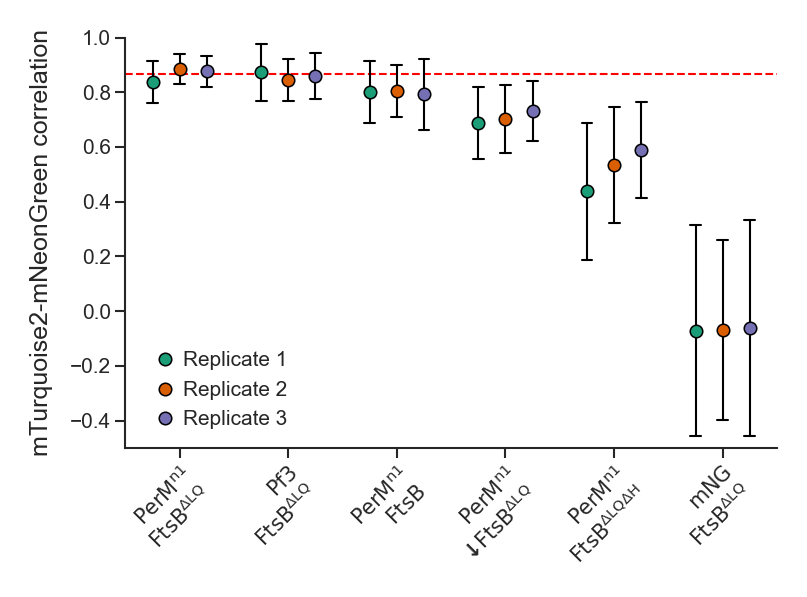

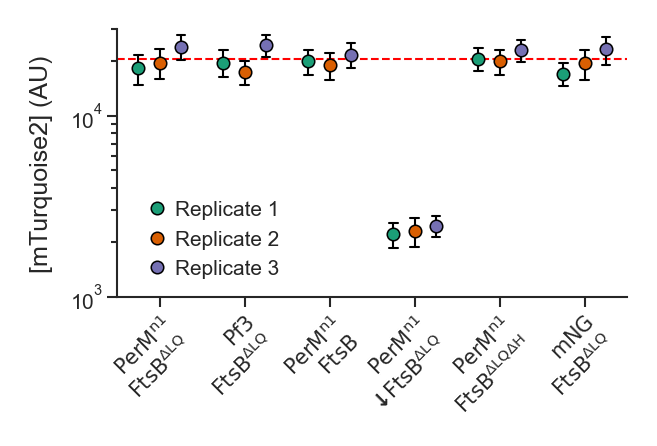

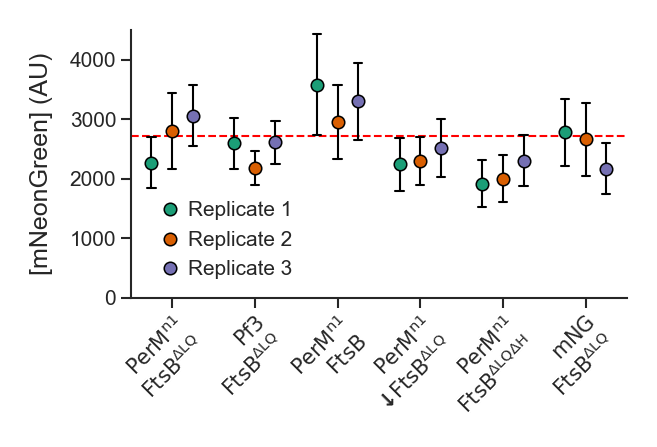

In [13]:
import seaborn as sns

i = 1
for d in df_stats.Date.unique():
    df_stats.loc[df_stats.Date==d,'Replicate'] = 'Replicate ' + str(i)
    i+=1

sns.set_theme(style='ticks',
              palette=sns.color_palette('Dark2'),
              font='Arial',
              rc={'figure.dpi': 300,
                  'figure.figsize':(7.2,4), # 7.2 inch is full page width
                  'axes.spines.right':False,
                  'axes.spines.top':False,
                  'axes.linewidth':0.5,
                  'font.size':7,
                  'xtick.labelsize':5,
                  'ytick.labelsize':5,
                  'xtick.major.pad':1,
                  'ytick.major.pad':1,
                  'xtick.major.size':2.5,
                  'ytick.major.size':2.5,
                  'xtick.minor.size':1.5,
                  'ytick.minor.size':1.5,
                  'xtick.major.width':0.5,
                  'ytick.major.width':0.5,
                  'xtick.minor.width':0.5,
                  'ytick.minor.width':0.5,
                  'axes.titlesize':6,
                  'axes.labelsize':6,
                  'legend.fontsize':5,
                  'legend.title_fontsize':6})

strains = df_stats.Strain.unique()
# hue_order = [strains[x] for x in [4,2,0,1,3,5]] # uncomment for custom order

pretty_labels = {'PerMn1-mNG | mTq2-FtsB':r'$\text{PerM}^\text{n1}$' '\n' r'$\text{FtsB}$',
                'PerMn1-mNG | mTq2-FtsBdLQ':r'$\text{PerM}^\text{n1}$' '\n' r'$\text{FtsB}^\text{ΔLQ}$',
                'PerMn1-mNG | mTq2-FtsBdLQ uninduced':r'$\text{PerM}^\text{n1}$' '\n' r'$\mathbf{↓}\text{FtsB}^\text{ΔLQ}$',
                'PerMn1-mNG | mTq2-FtsBdLQdH':r'$\text{PerM}^\text{n1}$' '\n' r'$\text{FtsB}^\text{ΔLQΔH}$',
                'Pf3-mNG | mTq2-FtsBdLQ':r'$\text{Pf3}$' '\n' r'$\text{FtsB}^\text{ΔLQ}$',
                'mNG | mTq2-FtsBdLQ':r'$\text{mNG}$' '\n' r'$\text{FtsB}^\text{ΔLQ}$'}

p = 'Dark2'

plot_info = [['mTurquoise2-mNeonGreen correlation', 'Correlation',[-0.5, 1]],
             ['[mTurquoise2] (AU)', 'mTq2_conc',[1000, 30000]], 
            ['[mNeonGreen] (AU)', 'mNG_conc',[0, 4500]]]

plot_sizes = [(2.7,2),(2.2,1.5),(2.2,1.5)]

for i in range(len(plot_info)):
    val = plot_info[i]
    fig, ax = plt.subplots(figsize=plot_sizes[i])

    sns.pointplot(ax=ax,data=df_stats,x='Strain',y=val[1],hue='Replicate',markers='o',linewidth=0.5,errorbar='sd',capsize=0.1,dodge=0.5,markersize=3,linestyle='none',order=hue_order,palette=p,legend='auto',alpha=1,
                  err_kws = {'linewidth':0.5,'zorder':2,'color':'k'}, markeredgecolor='k',zorder=3)
    ax.axhline(baselines[i],c='r',linewidth=0.5,ls='--',zorder=1)
    
    labels = [pretty_labels[item.get_text()] for item in plt.gca().get_xticklabels()]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels,rotation=45,ha='right',rotation_mode='anchor')
    
    plt.xlabel('')
    plt.ylabel(val[0])
    
    if i==1:
        plt.yscale('log')
    plt.ylim(val[2])

    plt.legend(frameon=False,handletextpad=-0.15)
    plt.tight_layout()
    
    plt.savefig('../figures/analysis_output/fig4-'+val[1]+'.svg',bbox_inches='tight')
    


In [16]:
df_stats

,Strain,aTc (nM),IPTG (uM),Date,mNG_conc,mTq2_conc,Correlation,Replicate
0,PerMn1-mNG | mTq2-FtsBdLQ,10,100,231017,2209.315789,23864.469115,0.849208,Replicate 1
1,PerMn1-mNG | mTq2-FtsBdLQ,10,100,231017,2321.792585,20392.373591,0.862524,Replicate 1
2,PerMn1-mNG | mTq2-FtsBdLQ,10,100,231017,2751.010151,23498.815884,0.834805,Replicate 1
3,PerMn1-mNG | mTq2-FtsBdLQ,10,100,231017,2480.456065,21423.988930,0.883360,Replicate 1
4,PerMn1-mNG | mTq2-FtsBdLQ,10,100,231017,2327.148643,20535.604578,0.825716,Replicate 1
...,...,...,...,...,...,...,...,...
10925,mNG | mTq2-FtsBdLQ,10,60,231017,3235.268742,20075.785289,-0.654472,Replicate 1
10926,mNG | mTq2-FtsBdLQ,10,60,231017,3883.914324,19503.649918,-0.681625,Replicate 1
10927,mNG | mTq2-FtsBdLQ,10,60,231017,3103.355959,15219.527030,0.374448,Replicate 1
10928,mNG | mTq2-FtsBdLQ,10,60,231017,2679.926575,15791.199716,0.161720,Replicate 1


In [11]:
# Sample sizes to report in manuscript
from scipy import stats
print(len(df_stats),'total cells')

all_counts = []
for d in df_stats.Date.unique():
    for s in df_stats.Strain.unique():
        all_counts.append(len(df_stats.query('Date==@d & Strain==@s')))

print(f'%0.2f'%np.mean(all_counts),'+/-',f'%0.3f'%stats.sem(all_counts))

10930 total cells
607.22 +/- 43.598


(0.0, 3000.0)

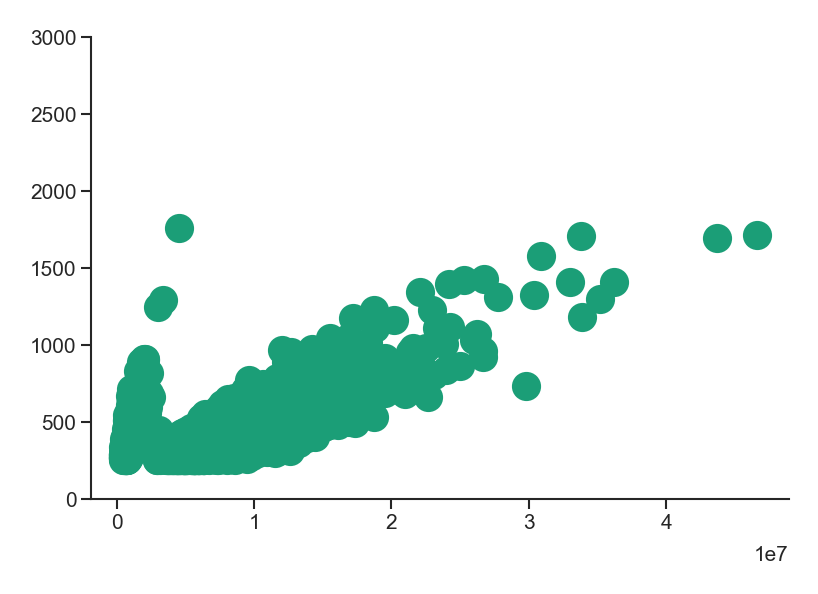

In [12]:
# Visualized scatter plots for area (px^2 vs intensity to identify thresholds for cells vs background events)

import matplotlib.pyplot as plt

dates = mTq2_sum.keys()

all_f = []
all_c = []

plt.figure(figsize=(3,2))
for date in dates:
    conditions = mTq2_sum[date].keys()
    for condition in conditions:
        all_f += np.concatenate(mTq2_sum[date][condition]).tolist()
        # all_f += np.concatenate(mNG_sum[date][condition]).tolist()
        all_c += np.concatenate(area[date][condition]).tolist()

plt.scatter(all_f,all_c)
# plt.xlim([0,1e6])
plt.ylim([0,3000])
